In [51]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import pandas as pd

# Load your dataset
df_alz = pd.read_csv("../alzheimers_disease_data.csv")

# Drop the 'DoctorIncharge' column
df_alz = df_alz.drop(["DoctorInCharge", "PatientID"], axis=1)  # Pass column names as a list

# Verify the column has been removed
df_alz.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

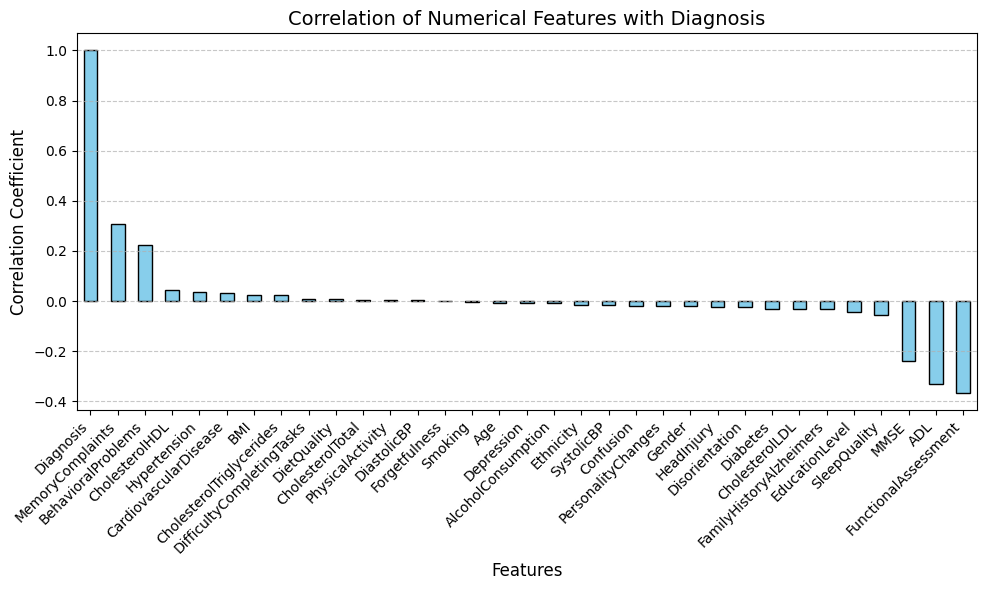

In [53]:
#Correlation (For Numerical Features)
#For numerical features and a categorical label (like diagnosis),
#calculate the correlation or use statistical tests like ANOVA.

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_alz is your DataFrame and 'diagnosis' is your label
numerical_features = df_alz.select_dtypes(include=["float64", "int64"]).columns
correlation = df_alz[numerical_features].corrwith(df_alz["Diagnosis"])

# Sort correlations
correlation_sorted = correlation.sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 6))
correlation_sorted.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Correlation of Numerical Features with Diagnosis', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [55]:
#Extract the selected features from dataset
selected_features = [
    'MMSE', 'FunctionalAssessment', 'ADL',
    'MemoryComplaints', 'BehavioralProblems'
]

In [57]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define features and target
X = df_alz[selected_features]
y = df_alz['Diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Assuming 'y' is the target variable
#X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42) #Use 0.2 as test because accuracy is higher
model = xgb.XGBClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Accuracy: Proportion of correctly classified instances.
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
#From 0.94 decreased to 0.92 (SMOTE)

Accuracy: 0.9441860465116279


In [59]:
#Precision: Proportion of positive predictions that are actually correct.
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")
#From 0.9266 decreased to 0.869

Precision: 0.9266666666666666


In [61]:
#F1-Score: Harmonic mean of Precision and Recall. It's useful when you need a balance between Precision and Recall.
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1}")
#From 0.92 decreased to 0.894

F1-Score: 0.9205298013245033


ROC AUC: 0.9481493752366527


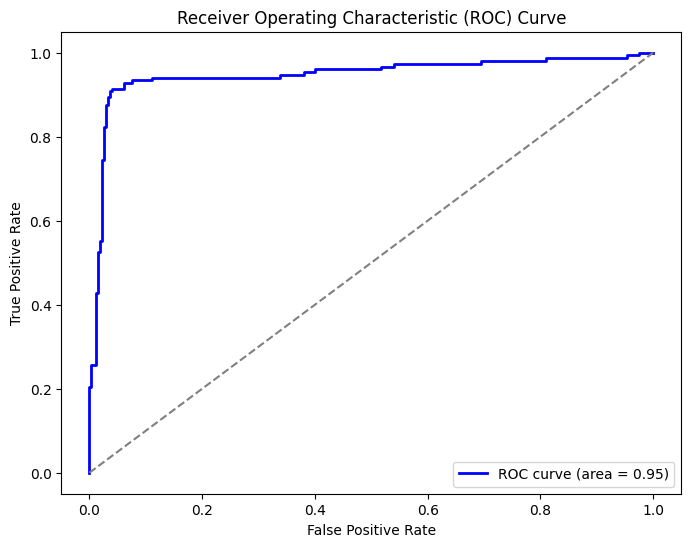

In [63]:
#ROC Curve and AUC (Area Under the Curve): Measures the performance of a binary classification model at all classification thresholds.
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc}")

#Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
#Area 0.948 decreased to 0.937

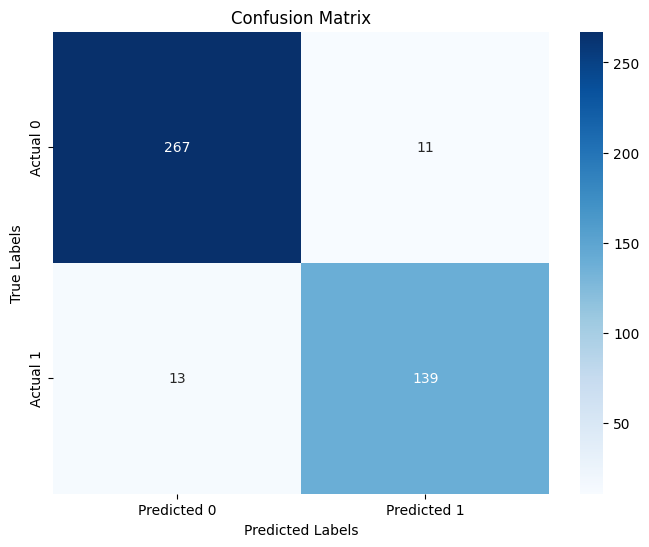

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [67]:
#2. Extract the leaf node indices for each sample in the dataset XGBoost method

# Step 1: Extract the leaf node indices for all samples in the training set
leaf_indices = model.apply(X_train)

# Step 2: Filter the dataset for samples with Alzheimer's (label '1')
alzheimers_indices = np.where(y_train == 1)[0]  # Get indices of samples with Alzheimer's (label 1)

# Step 3: Extract the leaf node indices for only Alzheimer's samples
leaf_indices_alzheimers = leaf_indices[alzheimers_indices]

# Step 4: Print the leaf node indices for the first 5 Alzheimer's samples
print("Leaf node indices for the first 5 Alzheimer's samples:")
print(leaf_indices_alzheimers[:5])

Leaf node indices for the first 5 Alzheimer's samples:
[[ 7.  7. 16. 56. 54. 54. 61. 56. 52. 46. 38. 59. 43. 26. 39. 39. 37. 26.
  33. 34. 40. 30. 27. 38. 36. 37. 31. 36. 32. 32. 24. 27. 22. 43. 25. 40.
  21. 30. 31. 38. 27. 22. 40. 37. 46. 39. 27. 40. 13. 32. 32. 32. 32. 20.
  44. 31. 42. 27. 28. 17. 35. 32. 27. 34. 30. 42. 14. 27.  4. 27. 33. 36.
  23. 28. 28. 27. 24. 32. 25. 20. 24. 36. 17. 22. 28. 34. 35. 35. 35. 28.
  25. 24. 30. 30. 25. 33. 34. 21. 26. 21.]
 [19. 16. 33. 61. 60. 60. 67. 61. 35. 22. 35. 42. 44. 16. 40. 22. 33. 15.
  34. 27. 40. 51. 16.  8. 38. 37.  3. 41. 31. 37. 16. 27. 22. 11. 25. 40.
  25. 30. 38. 38. 34. 22. 11. 35. 18. 14. 30. 13. 13. 31. 19. 21. 32. 15.
  47. 33. 42. 28. 30. 27. 33. 32. 34. 32. 27. 43. 44. 21.  4. 28. 33. 23.
  24. 23. 27. 29. 25. 32.  5. 20. 23. 33. 15. 22. 11. 17. 35. 33. 41. 19.
  25. 24. 21. 25. 25. 27. 21.  9. 26. 16.]
 [ 7.  7. 16. 15. 15. 15. 60. 54. 52. 46. 38. 52. 40. 26. 39. 39. 37. 26.
  44. 34. 40. 50. 27. 37. 36. 37. 30. 36. 31.

In [69]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Step 4: Flatten the leaf indices for Alzheimer's samples (shape: (n_samples * n_trees, 1))
leaf_indices_flattened = leaf_indices_alzheimers.reshape(-1, 1)

# Step 5: One-hot encode the leaf indices
encoder = OneHotEncoder(sparse_output=False)
leaf_indices_encoded = encoder.fit_transform(leaf_indices_flattened)

# Step 6: Reshape the one-hot encoded array to match the number of Alzheimer's samples
n_samples_alzheimers = leaf_indices_alzheimers.shape[0]
n_trees = leaf_indices_alzheimers.shape[1]

# Reshape the one-hot encoded array to match (n_samples_alzheimers, n_trees * n_leaf_categories)
leaf_indices_encoded_reshaped = leaf_indices_encoded.reshape(n_samples_alzheimers, -1)

# Step 7: Ensure you're indexing X_train properly. If X_train is a NumPy array:
X_train_alzheimers = X_train.iloc[alzheimers_indices]  # For Pandas DataFrame, use .iloc to index by row

# Step 8: Concatenate the original features of Alzheimer's samples with the one-hot encoded leaf indices
X_encoded = np.hstack([X_train_alzheimers, leaf_indices_encoded_reshaped])

# Step 9: Print the shape of the encoded dataset
print("Shape of the encoded dataset:", X_encoded.shape)

Shape of the encoded dataset: (608, 8305)


In [71]:
from sklearn.decomposition import PCA
import numpy as np

# Step 1: Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # You can adjust n_components depending on how much variance you want to preserve

# Perform PCA only on the leaf indices (not the entire feature set)
leaf_indices_pca = pca.fit_transform(leaf_indices_encoded_reshaped)

# Print the shape of the PCA-reduced leaf indices
print("Shape of the PCA-reduced leaf indices:", leaf_indices_pca.shape)

# Step 2: Concatenate the original features (only Alzheimer's samples) with the PCA-reduced leaf indices
# Make sure you're using the Alzheimer's samples from X_train, not the full X_train dataset
# Ensure that you are using iloc for row indexing in a DataFrame
X_train_alzheimers = X_train.iloc[alzheimers_indices]  # Use .iloc[] to index by row for a DataFrame

# Concatenate the features and PCA-reduced leaf indices
X_encoded_reduced = np.hstack([X_train_alzheimers, leaf_indices_pca])

# Print the shape of the encoded and reduced dataset
print("Shape of the encoded and reduced dataset:", X_encoded_reduced.shape)


Shape of the PCA-reduced leaf indices: (608, 2)
Shape of the encoded and reduced dataset: (608, 7)


In [47]:
!pip install KMedoids
!pip install scikit-learn-extra

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Shape of the clustered dataset with labels: (608, 8)
Cluster labels for the first 10 samples: [2 0 1 0 1 1 1 2 0 1]
Silhouette Score for K-Means: 0.31308637912492776
Clustered data with PCA components and cluster labels:
   Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0  11.968872   4.001694   4.918146        0.0        0.0   1.978436   
1  11.671289   0.298203   5.590417        1.0        0.0  -3.489616   
2  14.194316   3.163243   3.172298        0.0        0.0   3.321598   
3   4.764855   7.140732   2.557549        1.0        0.0  -3.309977   
4  18.290064   9.194753   4.630248        0.0        1.0  -1.803214   

   Feature_6      PCA1      PCA2  Cluster  
0  -0.694613 -0.086552  0.474819        2  
1   0.838325 -0.084954 -1.914679        0  
2   0.126399  1.874026  3.086474        1  
3   2.934264 -6.827017 -3.482316        0  
4  -3.145592  6.844708 -4.045614        1  


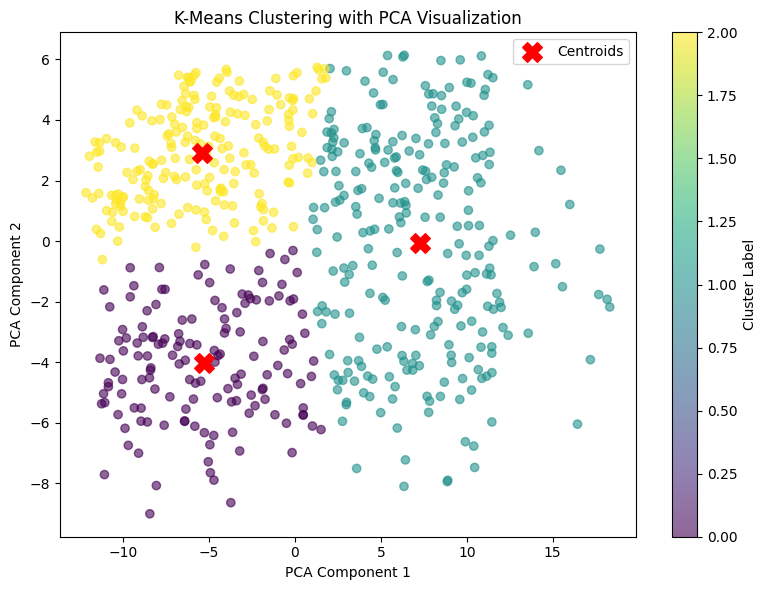

<Figure size 640x480 with 0 Axes>

In [75]:
#5,6) 5.Use the features vector for clustering, with the X_features or reduced_features. 6.Apply K-Means   --------APPLY K-MEANS WITHOUT SCALER
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

# Drop the diagnosis column from X_encoded_reduced if it exists
# Assuming diagnosis is in y_train, we don't need to include it for clustering
# So here, we just work with the feature set without the diagnosis label

# Apply KMeans clustering
n_clusters = 3  # You can change this based on your analysis
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_encoded_reduced)

# Add the cluster labels to the original data for further analysis
X_encoded_reduced_with_labels = np.hstack([X_encoded_reduced, kmeans_labels.reshape(-1, 1)])

# Display the resulting shape
print("Shape of the clustered dataset with labels:", X_encoded_reduced_with_labels.shape)

# You can also inspect the cluster labels
print("Cluster labels for the first 10 samples:", kmeans_labels[:10])

# Assuming X_encoded_reduced is your feature matrix and kmeans_labels are the cluster labels

# Apply PCA to reduce the dimensions
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X_encoded_reduced)
# Create a DataFrame for better organization
clustered_data_Kmeans = pd.DataFrame(X_encoded_reduced, columns=[f"Feature_{i}" for i in range(X_encoded_reduced.shape[1])])
clustered_data_Kmeans['PCA1'] = X_pca[:, 0]  # First principal component
clustered_data_Kmeans['PCA2'] = X_pca[:, 1]  # Second principal component
clustered_data_Kmeans['Cluster'] = kmeans_labels  # Cluster labels

# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(X_encoded_reduced, kmeans_labels)
print(f"Silhouette Score for K-Means: {silhouette_avg}")

# Inspect the DataFrame to track the cluster assignment of each row
print("Clustered data with PCA components and cluster labels:")
print(clustered_data_Kmeans.head())

# Visualize the clusters
plt.figure(figsize=(8, 6))

# Scatter plot with cluster colors
scatter = plt.scatter(clustered_data_Kmeans['PCA1'], clustered_data_Kmeans['PCA2'],
                       c=clustered_data_Kmeans['Cluster'], cmap='viridis', alpha=0.6, marker='o')

# Add cluster centroids to the plot
centroids = pca_2d.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label="Centroids")

# Add labels, title, and color bar
plt.colorbar(scatter, label='Cluster Label')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering with PCA Visualization')
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig('confusion_matrix_Unsupervise_KMeans.png', dpi=300, bbox_inches='tight')

In [61]:
# Save clustered_data_Kmeans_Scaler to CSV
clustered_data_Kmeans.to_csv('clustered_data_Kmeans_Scaler.csv', index=False)
print("File 'clustered_data_Kmeans_Scaler.csv' has been saved!")

File 'clustered_data_Kmeans_Scaler.csv' has been saved!


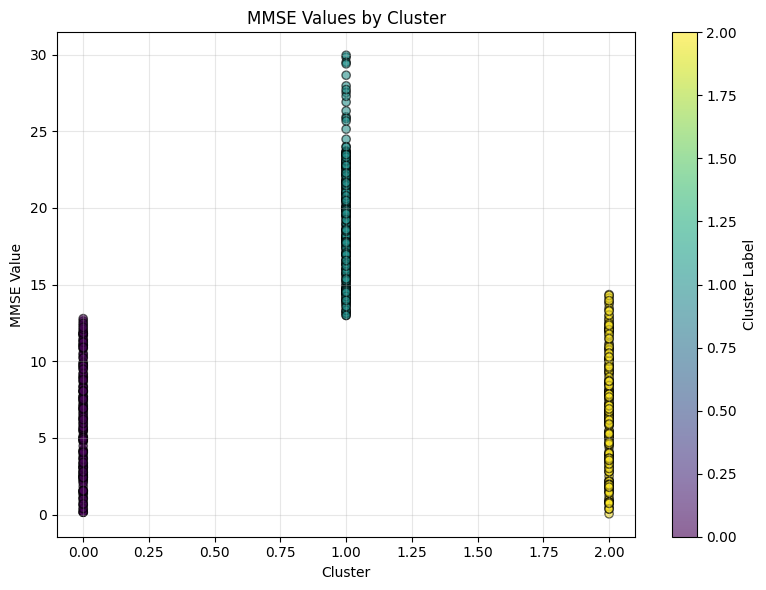

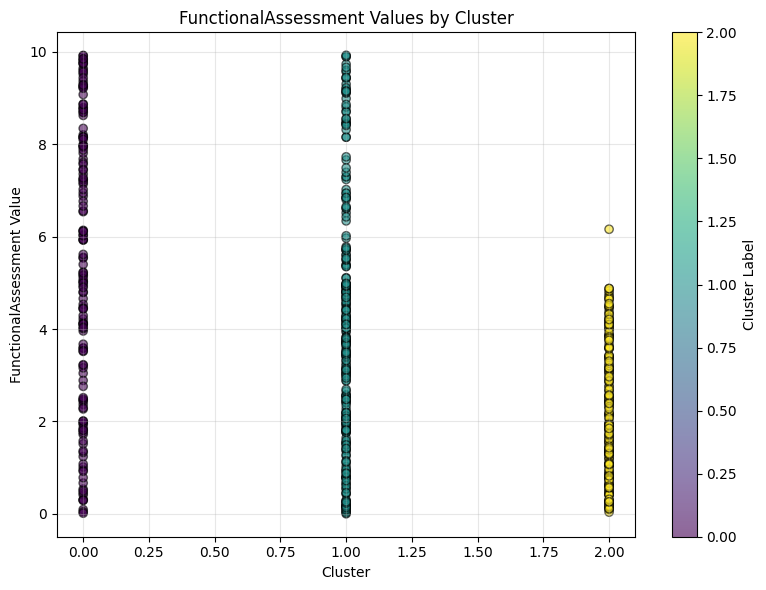

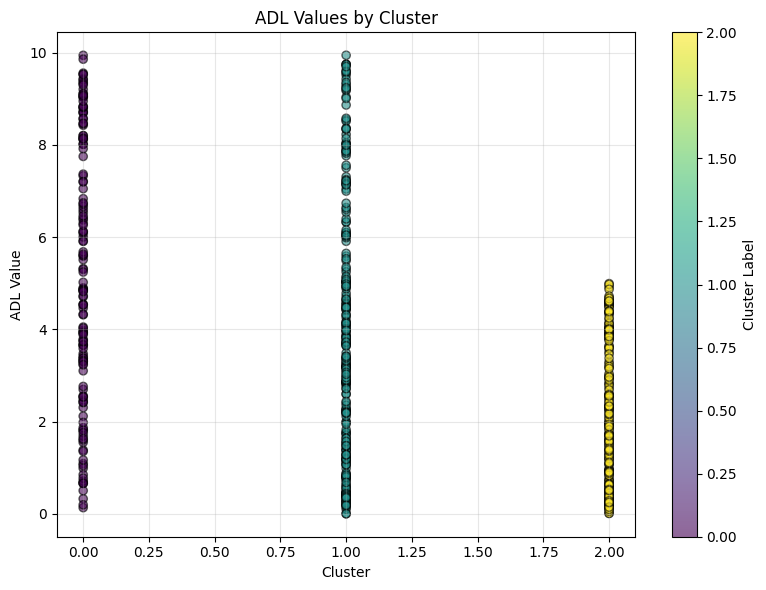

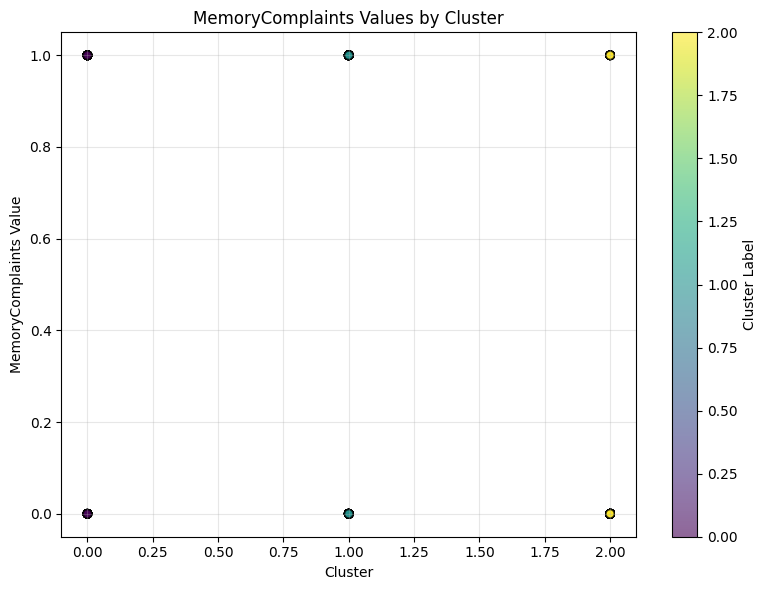

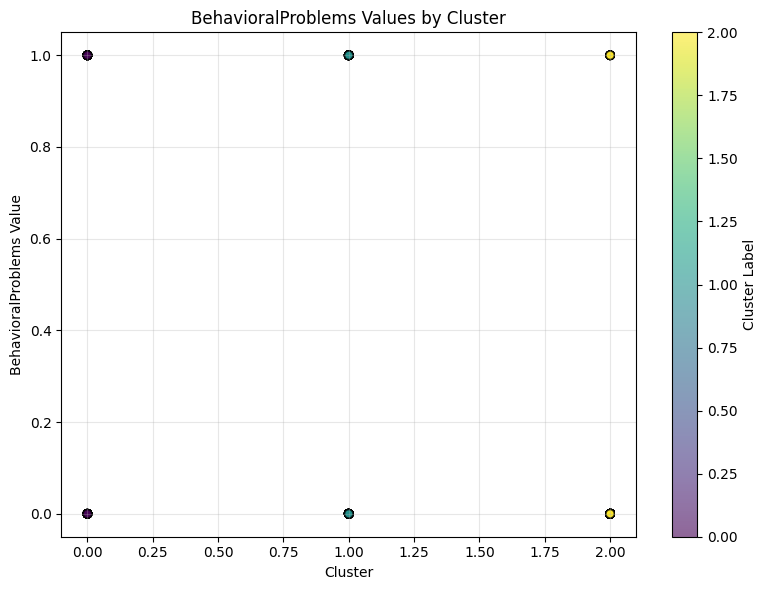

In [62]:
#Display the relationship between cluster and each top 5 features

#Apply K-Means without Scaler = 0.198, Among these 4 method, the K-Means without Scaler is the most well-separated, and appropriately assigned.
import matplotlib.pyplot as plt

# Mapping original feature names to new names
feature_names = {
    'Feature_0': 'MMSE',
    'Feature_1': 'FunctionalAssessment',
    'Feature_2': 'ADL',
    'Feature_3': 'MemoryComplaints',
    'Feature_4': 'BehavioralProblems'
}

# Generate a separate graph for each feature
for feature, name in feature_names.items():
    if feature in clustered_data_Kmeans.columns:
        plt.figure(figsize=(8, 6))

        # Scatter plot for the feature with actual values
        plt.scatter(clustered_data_Kmeans['Cluster'], clustered_data_Kmeans[feature],
                    c=clustered_data_Kmeans['Cluster'], cmap='viridis', alpha=0.6, edgecolor='k')

        # Add labels and title
        plt.xlabel('Cluster')
        plt.ylabel(f'{name} Value')
        plt.title(f'{name} Values by Cluster')
        plt.colorbar(label='Cluster Label')
        plt.grid(alpha=0.3)
        plt.tight_layout()

        # Show the plot
        plt.show()
    else:
        print(f"Column '{feature}' not found in the data. Please check the column names.")
# Focus on MMSE graph only,
#cluster 0 = low MMSE
#cluster 1 = high MMSE
#cluster 2 = medium MMSE